#**Projekt - Explorační datová analýza a shlukování**

**Dataset: Sociální, genderová a studijní data od středoškoláků**

**Autor: Martin Rečka - REC0012**

Dataset obsahuje širokou škálu informací o studentech, jako je jejich sociální zázemí, pohlaví, studijní návyky, rodinná situace a další.

# Úkol 1. - Explorační datová analýza

## Popis všech atributů:

* **school** – škola studenta (binární: 'GP' - Gabriel Pereira nebo 'MS' - Mousinho da Silveira)
* **sex** – pohlaví studenta (binární: 'F' - žena nebo 'M' - muž)
* **age** – věk studenta (číselné: od 15 do 22 let)
* **address** – typ bydliště (binární: 'U' - městská (urban) nebo 'R' - venkovská (rural))
* **famsize** – velikost rodiny (binární: 'LE3' - méně nebo rovno 3 nebo 'GT3' - více než 3)
* **Pstatus** – status soužití rodičů (binární: 'T' - žijí spolu nebo 'A' - rozvedeni)
* **Medu** – vzdělání matky (číselné: 0 - žádné, 1 - základní (4. třída), 2 - 5. až 9. třída, 3 - střední škola nebo 4 - vyšší vzdělání)
* **Fedu** – vzdělání otce (číselné: 0 - žádné, 1 - základní (4. třída), 2 - 5. až 9. třída, 3 - střední školní vzdělání nebo 4 - vyšší vzdělání)
* **Mjob** – zaměstnání matky (kategorické: 'učitelka(teacher)', 'zdravotní péče(health)', 'veřejné služby(services)' (např. administrativa nebo policie), 'doma(at_home)' nebo 'jiné(other)'))
* **Fjob** – zaměstnání otce (kategorické: 'učitelka(teacher)', 'zdravotní péče(health)', 'veřejné služby(services)' (např. administrativa nebo policie), 'doma(at_home)' nebo 'jiné(other)'))
* **reason** – důvod pro výběr školy (kategorické: blízko domova(home), reputace školy(reputation), preference oboru(course) nebo jiné(other))
* **guardian** – opatrovník studenta (kategorické: 'matka', 'otec' nebo 'jiný')
* **traveltime** – doba cesty z domova do školy (číselné: 1 - méně než 15 minut, 2 - 15 až 30 minut, 3 - 30 minut až 1 hodina, nebo 4 - více než 1 hodina)
* **studytime** – Týdenní doba věnovaná studiu (číselné: 1 - méně než 2 hodiny, 2 - 2 až 5 hodin, 3 - 5 až 10 hodin, nebo 4 - více než 10 hodin)
* **failures** – Počet neúspěšných pokusů (číselný: n, pokud 1 <= n < 3, jinak 4)
* **schoolsup** – extra vzdělávací podpora (binární: ano nebo ne)
* **famsup** – podpora rodiny ve vzdělávání (binární: ano nebo ne)
* **paid** – extra placené hodiny v rámci předmětu (binární: ano nebo ne)
* **activities** – mimoškolní aktivity (binární: ano nebo ne)
* **nursery** – navštěvoval školku (binární: ano nebo ne)
* **higher** – chce pokračovat ve vyšším vzdělání (binární: ano nebo ne)
* **internet** – přístup k internetu doma (binární: ano nebo ne)
* **romantic** – má romantický vztah (binární: ano nebo ne)
* **famrel** – kvalita rodinných vztahů (číselné: od 1 - velmi špatné po 5 - vynikající)
* **freetime** – volný čas po škole (číselné: od 1 - velmi nízký po 5 - velmi vysoký)
* **goout** – chodí ven s přáteli (číselné: od 1 - velmi nízký po 5 - velmi vysoký)
* **Dalc** – alkoholová konzumace během pracovního dne (číselné: od 1 - velmi nízká po 5 - velmi vysoká)
* **Walc** – alkoholová konzumace o víkendu (číselné: od 1 - velmi nízká po 5 - velmi vysoká)
* **health** – Aktuální zdravotní stav (číselné: od 1 - velmi špatný po 5 - velmi dobrý)
* **absences** – Počet absencí ve škole (číselné: od 0 do 93)

Atributy, které se vztahují k známkám v kurzu (portugalština):
* **G1** – První známka (číselné: od 0 do 20)
* **G2** – Druhá známka (číselné: od 0 do 20)
* **G3** – Konečná známka (cílový výstup: číselné, od 0 do 20)

## Import nezbytných knihoven:

In [77]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from google.colab import drive

## Načtení datasetu:

In [42]:
drive.mount('/content/drive')
df_original = pd.read_csv('/content/drive/MyDrive/student-por.csv')
df_original

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Počet chybějících hodnot:

In [ ]:
df_original.isna().sum().sort_values(ascending=False).head(5)

,0
school,0
paid,0
G2,0
G1,0
absences,0


Všechny záznamy obsahují všechna data a tedy se nemusíme potýkat s chybějícími hodnotami.

##Datové typy atributů

In [ ]:
df_original.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


Datové typy odpovídají jejich popisu výše. Máme zde numerické atributy (int64) **Age**, **Absences**, **G1**, **G2**, **G3**. Dále zde najdeme ordinální kategorické atributy (rovněž datový typ int64) **Medu**, **Fedu**, **traveltime**, **studytime**, **failures**, **famrel**, **freetime**, **goout**, **Dalc**, **Walc** a **health**. Nakonec zde mají zastoupení i nominální kategorické atributy (object) **school**, **sex**, **adress**, **famsize**, **Pstatus**, **Mjob**, **Fjob**, **reason**, **guardian**, **schoolsup**, **famsup**, **paid**, **activities**, **nursery**, **higher**, **internet** a **romantic**.

##Statistiky numerických a ordinálních kategorických atributů

In [ ]:
df_original.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


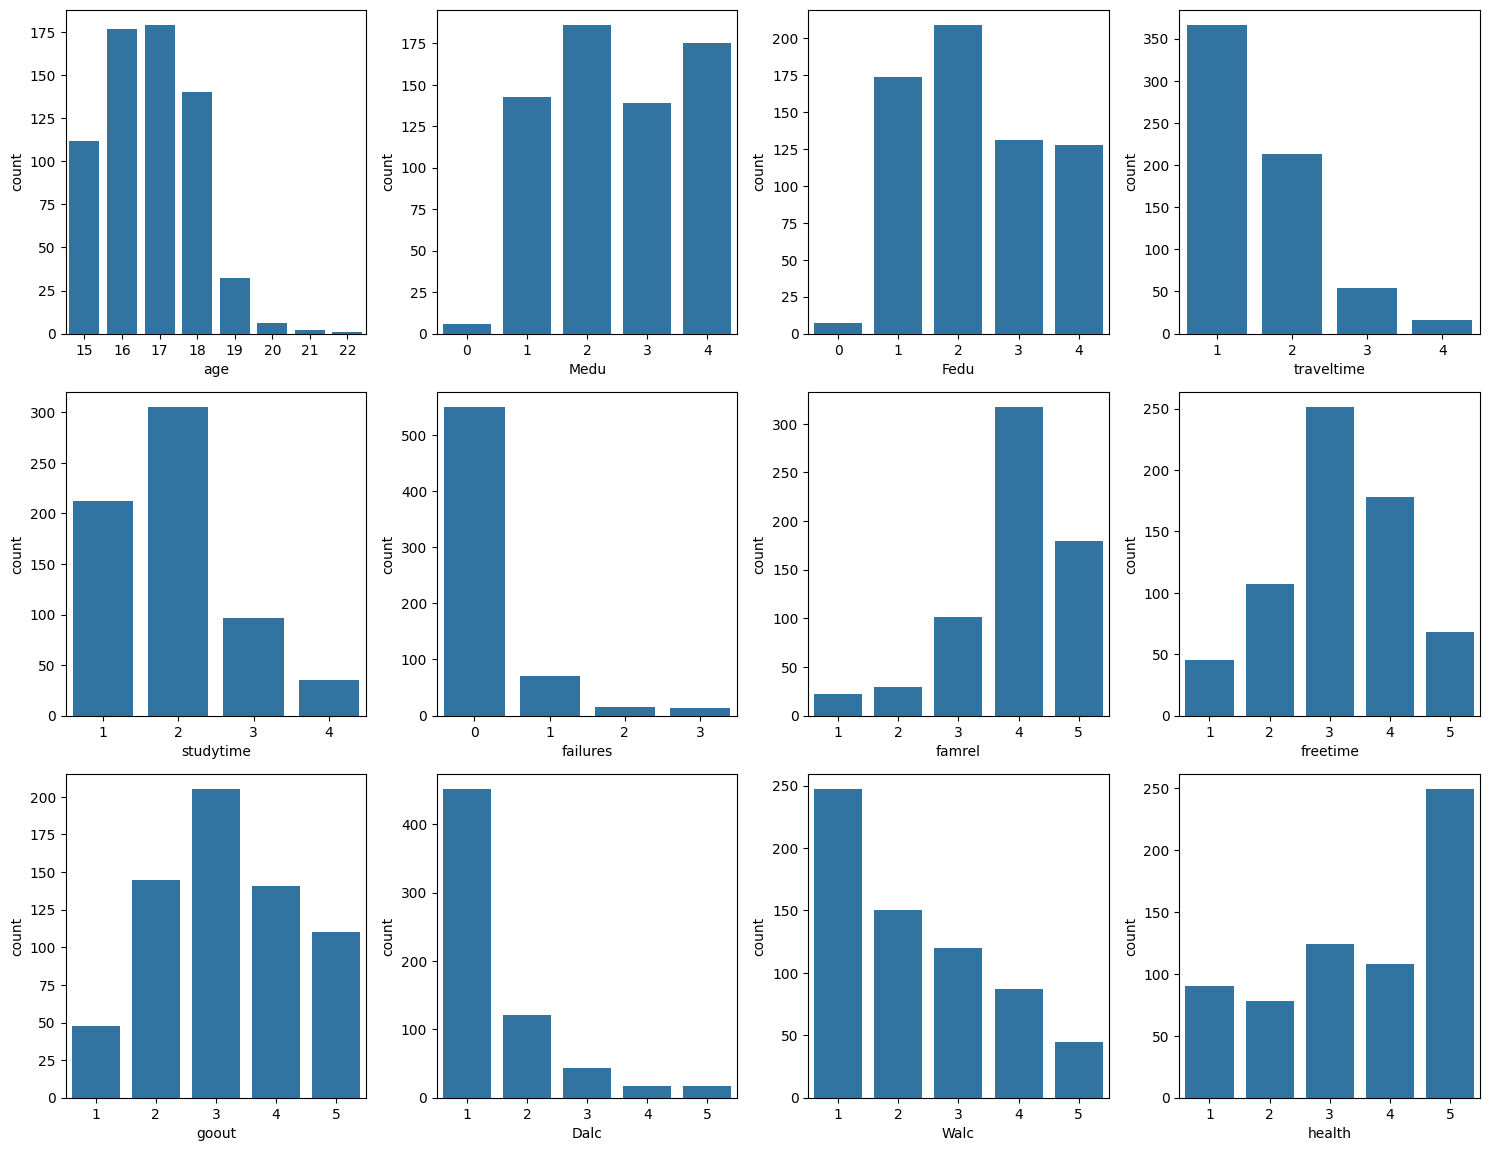

In [48]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()

columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

for i, col in enumerate(columns):
    sns.countplot(data=df_original, x=col, ax=axes[i])

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

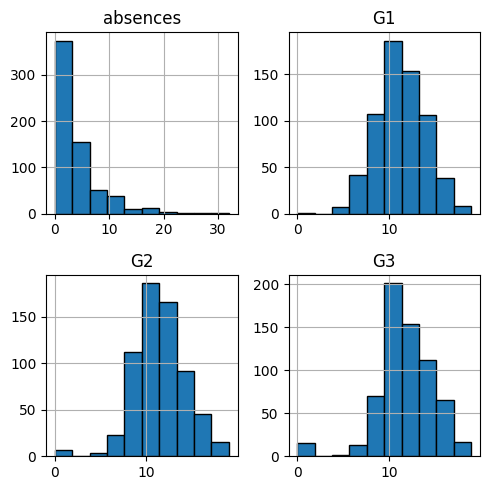

In [46]:
df_original[['absences', 'G1', 'G2', 'G3']].hist(figsize=(5, 5), edgecolor='black')
plt.tight_layout()
plt.show()




- atributy **G1**, **G2**, **G3**, **freetime**, **goout** mají symetrickou distribuci
- distribuce **absencí**, **failures**, **Dalc**, **age**, **traveltime**, **studytime** a **Walc** je zkosená zprava
- distribuce atributů **health** a **famrel** je zkosená zleva
- distribuce **Medu** a **Fedu** je víceméně uniformní

##Statistiky nominálních kategoriálních atributů

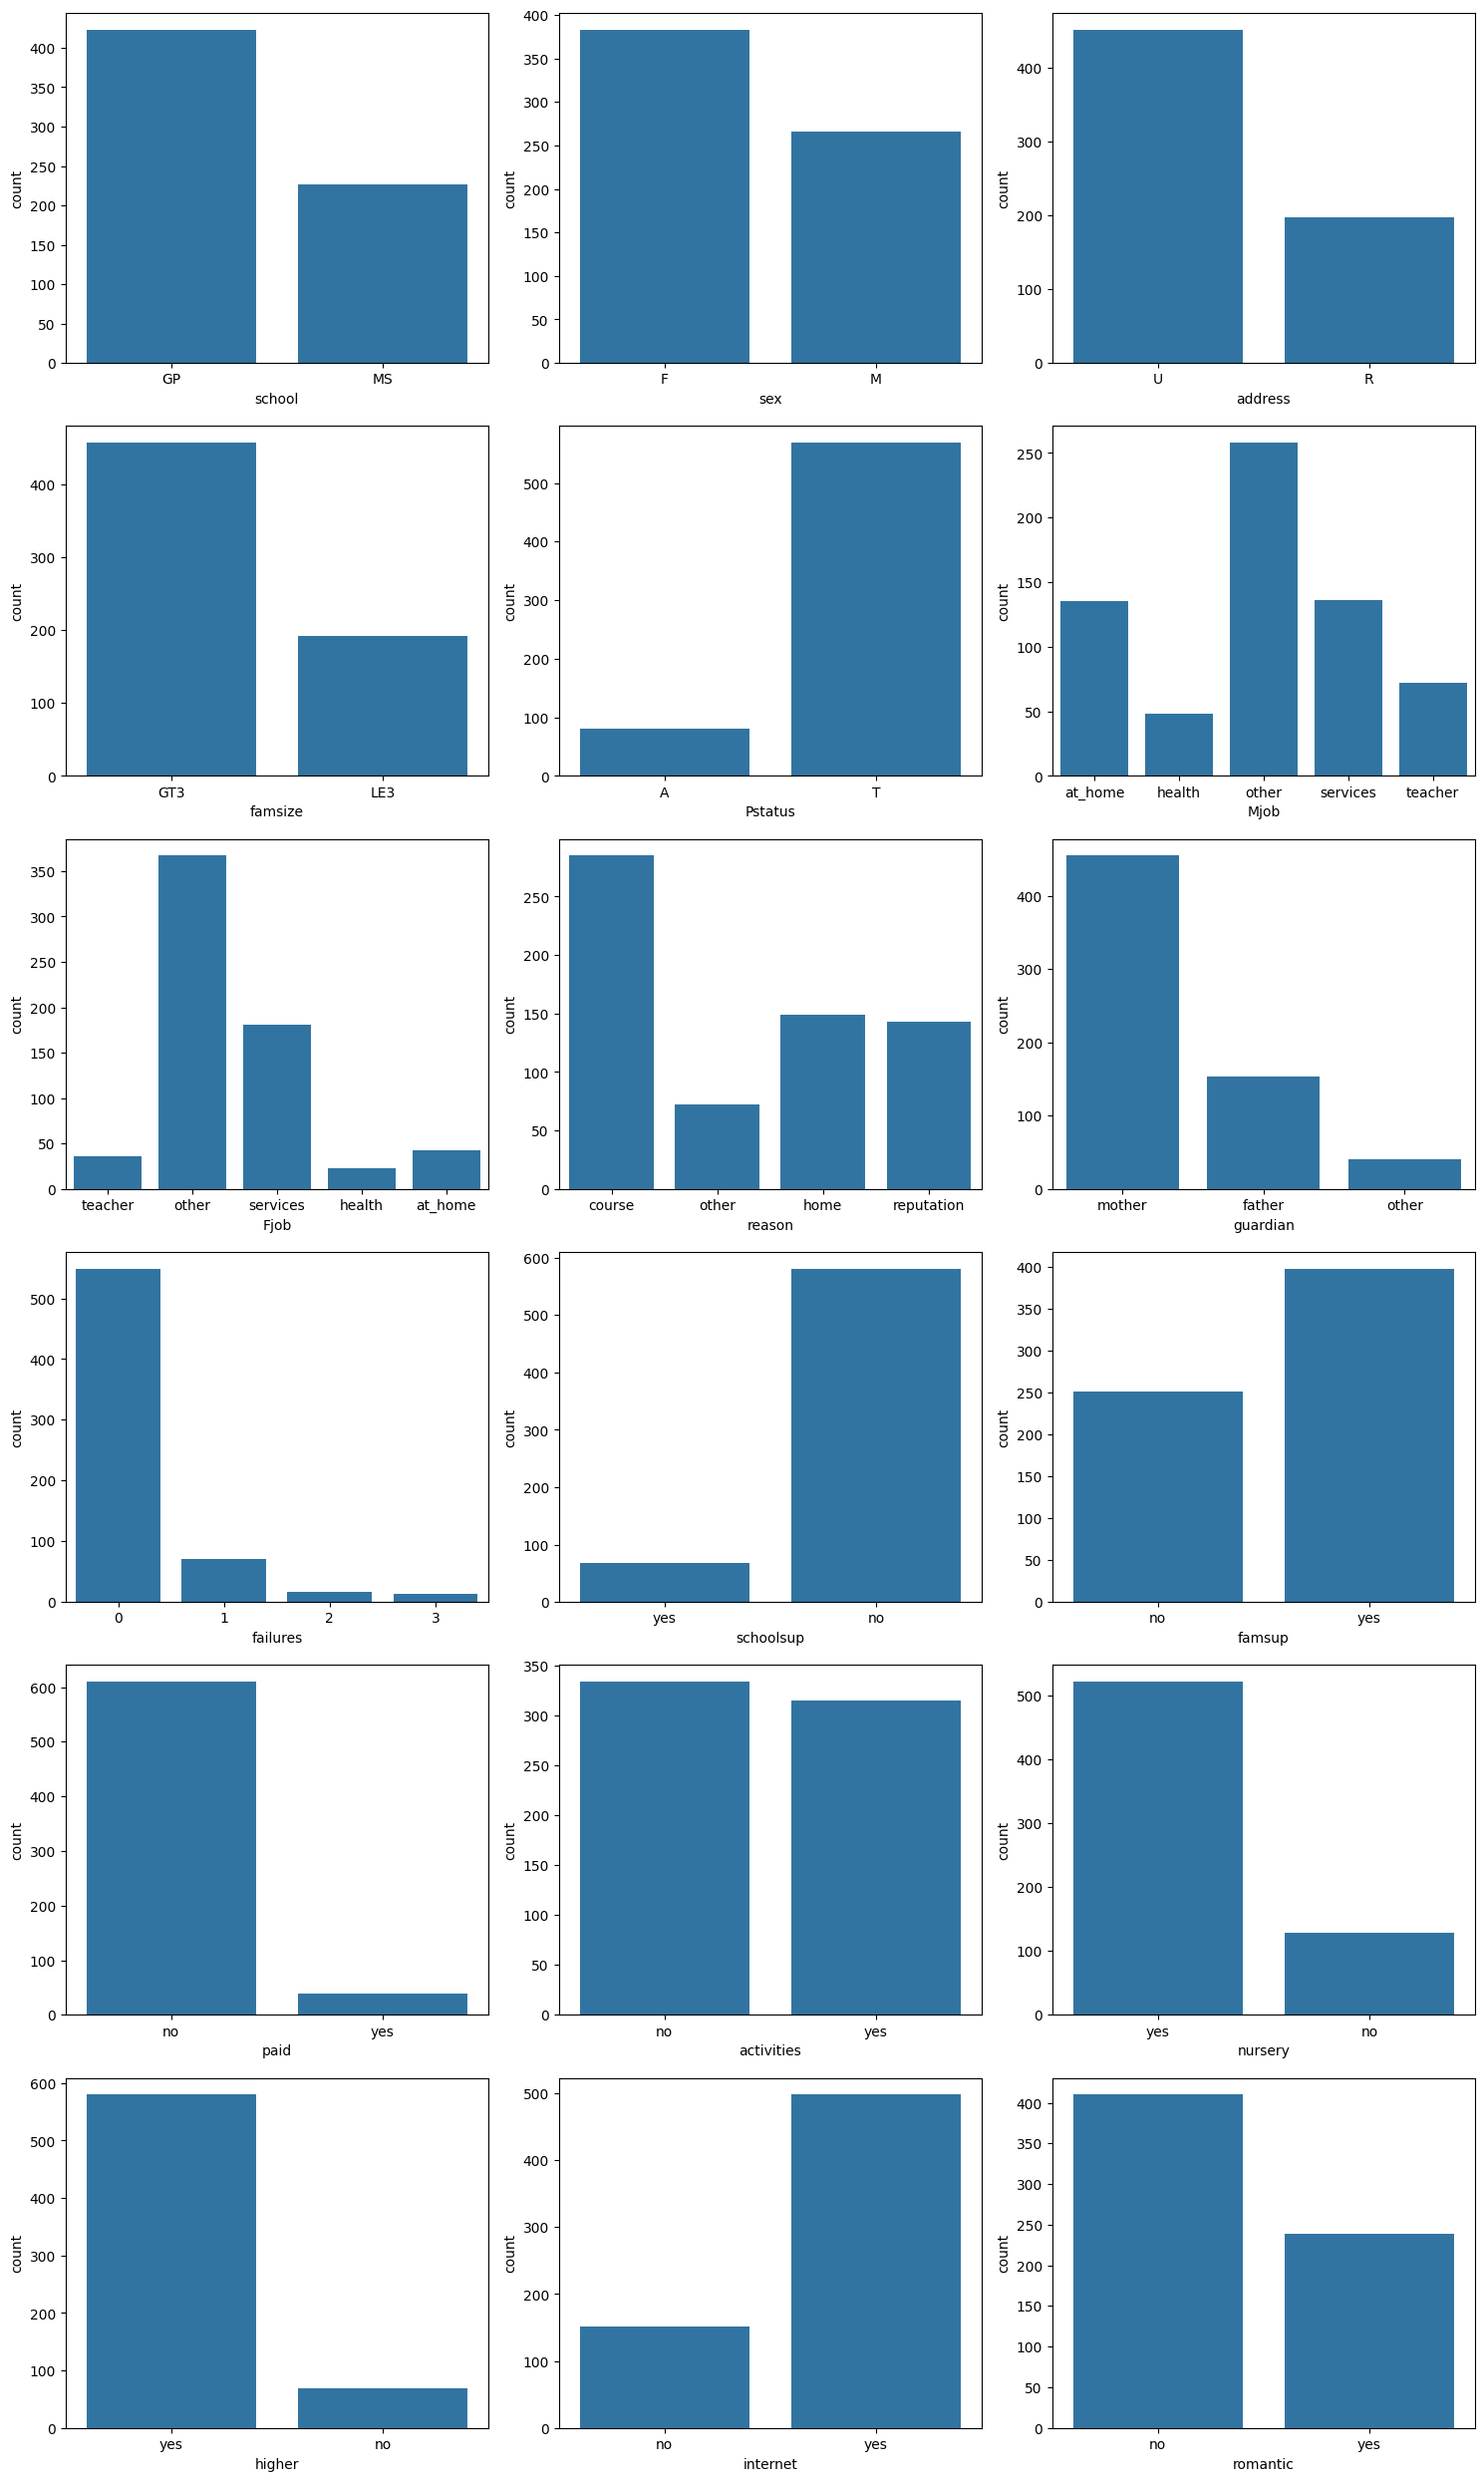

In [3]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.flatten()

columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]

for i, col in enumerate(columns):
    sns.countplot(data=df_original, x=col, ax=axes[i])

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Z vizualizace vyplývá, že:
- více studentů v datasetu navštěvuje školu GP
- žen je v datasetu o něco více než mužů
- více žáků bydlí ve městě než na vesnici
- více žáků pochází z rodiny sestávající z více než 3 členů než z rodin mešních
- výrazně více rodičů žáku žije dohromady, než zvlášť
- zaměstnání rodičů jsou různě zastoupena
- nejčastější důvodu výběru školy byl pro studenta daný studijní obor
- opatrovníkem studenta je nejčastěji matka
- drtivá většina studentů ve studiu nepochybila, tedy zatím zvládla předchozí předměty
- valná většina studentů nemá extra vzdělávací podporu
- více žáků v rodině podporu ve studiu má
- extra placené hodiny v rámci předmětu drtivá většina studentů nemá
- co se týká mimoškolních aktivit, těch se účastní zhruba polovina studentů
- většina studentů chodila do školky
- valná většina studentů uvažuje o vyšším vzdělání
- přístup k internetu má většina studentů
- ve vztahu jsou zhruba dvě třetiny studentů

##Korelace numerických atributů

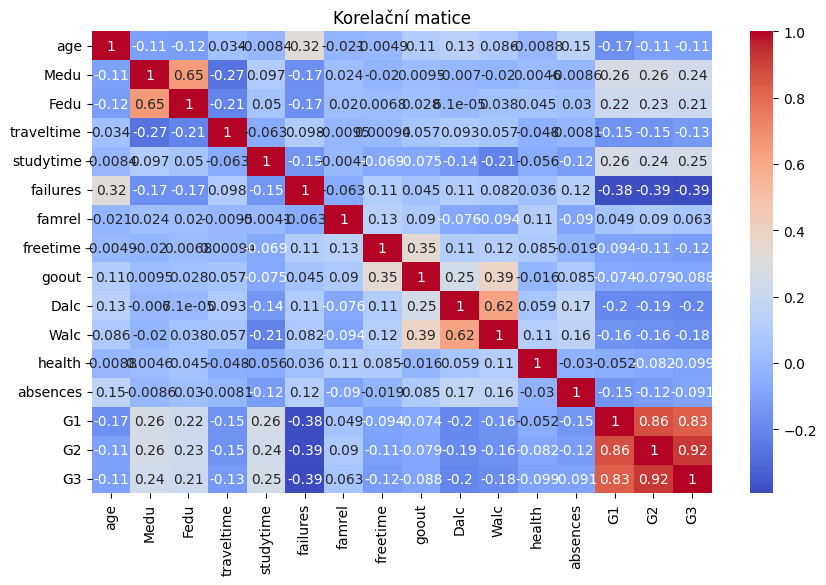

In [ ]:
numeric_df = df_original.select_dtypes(include=['int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelační matice')
plt.show()

- z vizualizace výše je zřejmá silná korelace mezi jednotlivými známkami **G1**, **G2** a **G3**, pro další analýzu bych tyto tři atributy spojil do jednoho (abych se vyhnul redundantním atributům)
- popíjení alkoholu v pracovní dny **Dalc** rovněž koreluje s popíjením alkoholu o víkendu **Walc**
- nakonec můžeme spatřit korelaci mezi vzděláním matky **Medu** a otce studenta **Fedu**
- naopak negativní korelaci spatřujeme mezi jednotlivými známkami a nezvládnutím předchozím předmětů **failures**

##Zprůměrování známek do jednoho atributu **grades**

In [55]:
df_original['grades'] = (df_original['G1'] + df_original['G2'] + df_original['G3']) / 3
df_original = df_original.drop(columns=['G1', 'G2', 'G3'])

##Další zajímavé vztahy v datasetu

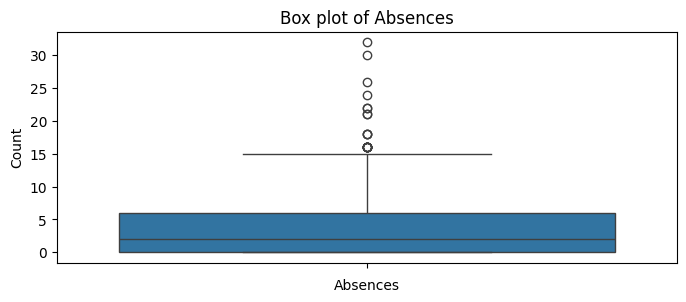

In [11]:
plt.figure(figsize=(8, 3))
sns.boxplot(y=df_original['absences'])
plt.title('Box plot of Absences')
plt.ylabel('Count')
plt.xlabel('Absences')
plt.show()

U absencí vidíme, že většina studentů má absence nižší než 15. Vyšší absence má jen několik jednotlivců.

<Axes: xlabel='school', ylabel='count'>

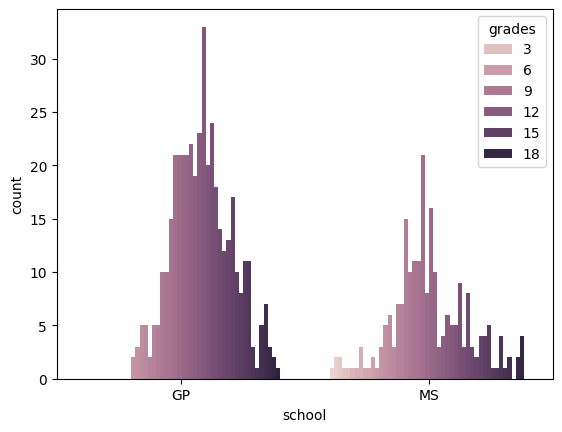

In [8]:
sns.countplot(data=df_original, x='school', hue='grades')

Ze sloupcového grafu výše můžeme vyčíst, že na škole MS se nachází i studenti s horšími známkami. Ti se na škole GP prakticky nevyskytují.

<Axes: xlabel='address', ylabel='count'>

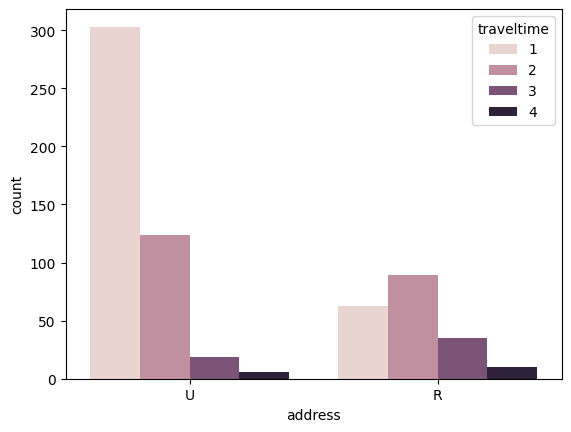

In [17]:
sns.countplot(data=df_original, x='address', hue='traveltime')

Na bar plotu výše vidíme vizualizaci cestovních dob do školy pro **studenty bydlící ve městě a na vesnici**. Můžeme spatřit, že studenti ve meště nejčastěji cestují do školy do 15 minut a tedy mají svou školu velice blízko, **studenti z venkovkých oblastí** musí v průměru do školy dojíždět déle.

<Axes: xlabel='nursery', ylabel='count'>

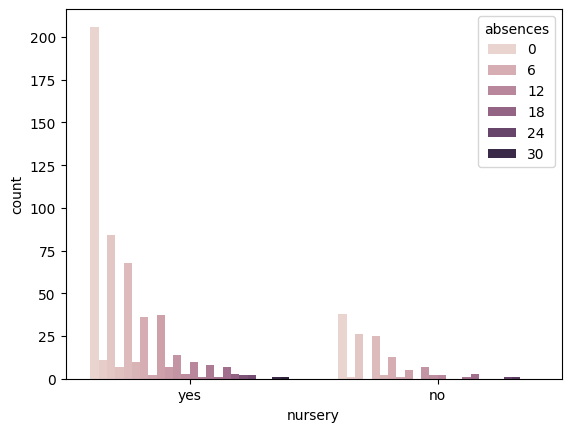

In [52]:
sns.countplot(data=df_original, x='nursery', hue='absences')


Zajímavou vizualizaci nám rovněž ukazuje graf rozdělující počty abscencí studentů dle toho, zda chodili do školky či nikoliv. U studentů, kteří dříve **chodili do školky** drtivě převažují ti s žádnými absencemi. U těch, co do **školky nechodili**, také převažují ti bez absencí, avšak už jen s drobným náskokem.

## Sourhn explorační datové analýzy:

Nejprve jsem popsal jednotlivé atributy datasetu, dataset jsem si načetl a zobrazil. Zjistil jsem, že obsahuje 649 záznamů, přičemž každý záznam má 33 atributů a nechybí žádné hodnoty. Následně jsem popsal datové typy atributů s ohledem na jejich rozdělení mezi numerické, kategoriální ordinální a kategoriální nominální. Vizualizoval jsem si distribuci jednotlivých atributů pomocí histogramů a sloupcových grafů. Následně pomocí heatmapy analyzoval jednolivé korelace mezi atributy. Z důvodu silné korelace mezi známkami jsem se rozhodl tyto atributy pro další práci sloučit do jednoho a tudíž dále má dataset 31 atributů. Následně jsem pomocí vizualizací hledal různé zajímavé informace skrývající se v datasetu. Vzhledem k vysokému množství kategorických atributů jsem používal primárně sloupcové grafy, které se pro kategorická data hodí nejlépe. Různá zjištění a závěry jsou popsána pro přehlednost přímo u jednotlivých bodů výše.

#Úkol 2. - Shlukování
Pro samotné shlukování je důležité si vybrat vhodné atributy a správně je upravit a naškálovat tak, aby vznikly co nejlépe definované shluky. Poměrně dlouho jsem experimentoval s různou podmnožinou atributů, abych dosáhl nejlepšího rozdělení, až jsem dospěl k následujícím zjištěním:
 - nominální kategoriální atributy s větším množstvím atributů **Mjob**, **Fjob**, **reason** a **guardian** značně snižují silhouette skóre a proto jsem se rozhodl ze shlukování tyto atributy vynechat

- různé kombinace binárních atributů **school**, **sex**, **adress**, **famsize**, **Pstatus**, **schoolsup**, **famsup**, **paid**, **activities**, **nursery**, **internet**, **romantic**, **higher** rovněž přispívají ke sníženému silhouette skóre a tudíž i tyto atributy ve shlukování vynechám

Jako vhodné atributy pro shlukování jsem nakonec vybral:
 - **absences** - atribut je nutno kvůli silně nevyvážené distribuci škálovat pomocî PowerTransform
 -**age** - věk rovněž naškálujeme, vzhledem k rozumné distribuci hodnot stačí využít MinMax normalizaci
 - **grades** - jedná se o průměrnou známku studenta vypočtenou z atributů G1, G2 a G3, rovnež normalizujeme pomocí MinMax
 - **studytime** - kategoriální ordinální atribut reprezentovaný číslem, ponechávám již beze změny
 - **Dalc** - kategoriální ordinální atribut reprezentovaný číslem, ponechávám již beze změny, jedná se o konzumaci alkoholu přes pracovní dny, zkoušel jsem využít i atribut Walc, což je konzumace přes víkend, ta však rozdělení shluků spíše škodí
 - **Medu** - vzdělání matky, kategoriální ordinální atribut reprezentovaný číslem, ponechávám již beze změny
 - **Fedu** - vzdělání otce, kategoriální ordinální atribut reprezentovaný číslem, ponechávám již beze změny (zvažoval jsem také sloučení vzdělání matky a otce do jednoho atributu, po chvíli exerimentování se však ukázalo jako lepší řešení ponechat tyto dva atributy pro shlukování zvlášť)

##Příprava datasetu pro shlukování

In [56]:
df_encoded = pd.DataFrame(index = df_original.index)
df_encoded['absences'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_original[['absences']])
df_encoded['age'] = sklearn.preprocessing.minmax_scale(df_original.age)
df_encoded['grades'] = sklearn.preprocessing.minmax_scale(df_original.grades)
df_encoded = df_encoded.join(df_original[['studytime', 'Dalc','Medu', 'Fedu']])

Náš dataset s upravenými a naškálovanými dat nyní vypadá následovně:

In [57]:
pd.set_option('display.max_columns', None)
df_encoded.head()

,absences,age,grades,studytime,Dalc,Medu,Fedu
0,0.587833,0.428571,0.346154,2,1,4,4
1,0.072587,0.285714,0.519231,2,1,1,1
2,0.909135,0.000000,0.634615,2,2,1,1
3,-1.157538,0.000000,0.730769,3,1,4,2
4,-1.157538,0.142857,0.634615,2,1,3,3


# Část 1. - K-means

Nejprve musíme zjistit, do kolika shluků je nejvhodnější data rozdělit. Na to použijeme **elbow method** a tzv. **silhouette score**.

In [58]:
X = df_encoded.values
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

df_clustering_scores

,sse,silhouette
k,,
2,2871.212505,0.201047
3,1997.178901,0.282569
4,1703.784207,0.249803
5,1563.339256,0.243490
6,1515.274520,0.171010
7,1352.431762,0.202712
8,1219.443583,0.209543
9,1172.842678,0.204267
10,1124.316995,0.199491


<Axes: xlabel='k', ylabel='sse'>

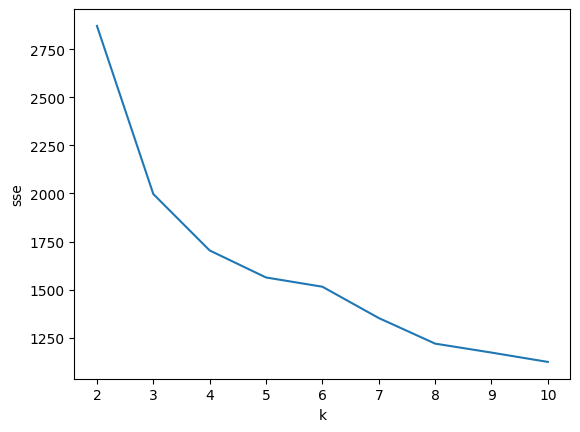

In [ ]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

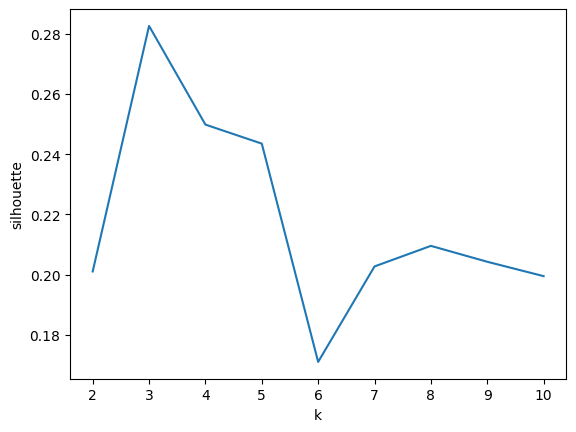

In [ ]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

Dle **elbow method** a dat zjištěných výše se jako nejrozumnější jeví rozdělit dataset na tři shluky. Příslušnost k danému shluků poté vložíme jako nový atribut do původního datasetu **df_original**.

In [59]:
clustering = sklearn.cluster.KMeans(n_clusters=3, random_state=12)
clustering.fit(X)

KMeans(n_clusters=3, random_state=12)

In [61]:
df_original['cluster_id'] = clustering.labels_
df_original.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades,cluster_id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,7.333333,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,10.333333,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12.333333,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14.000000,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,12.333333,1


##Četnost studentů v jednotlivých shlucích

<Axes: xlabel='cluster_id', ylabel='count'>

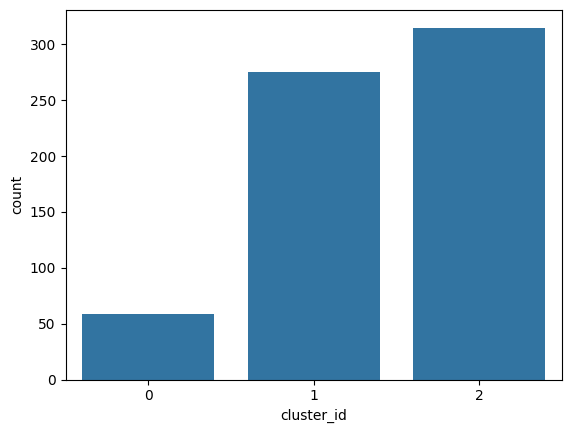

In [ ]:
sns.countplot(data=df_original, x='cluster_id')

Vidíme, že třetí shluk je nejpočetnější, naopak první shluk obsahuje jen něco málo přes 50 studentů.

##Vizualizace rozdělení vybraných atributů jednotlivých clusterů pomocí **boxplotů**:

<Axes: xlabel='cluster_id', ylabel='age'>

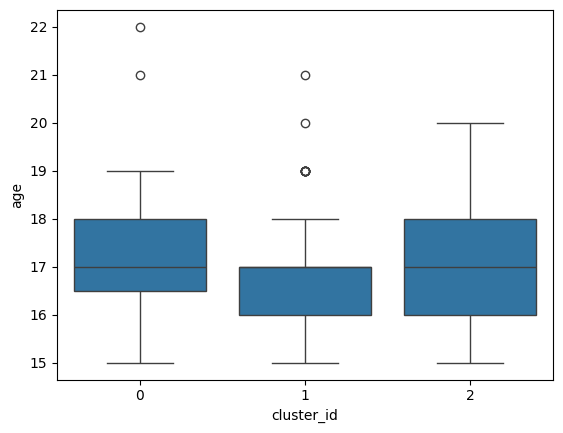

In [ ]:
sns.boxplot(data=df_original, y='age', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='grades'>

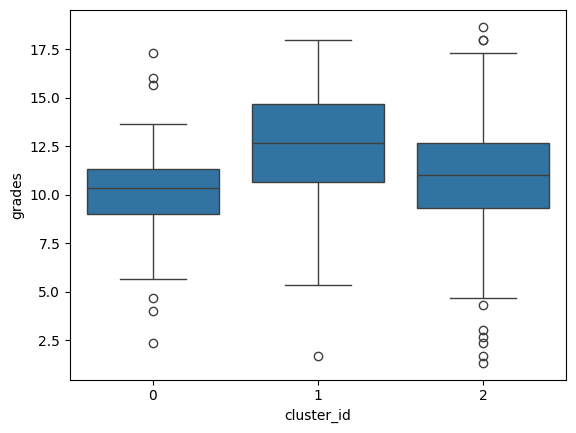

In [ ]:
sns.boxplot(data=df_original, y='grades', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='absences'>

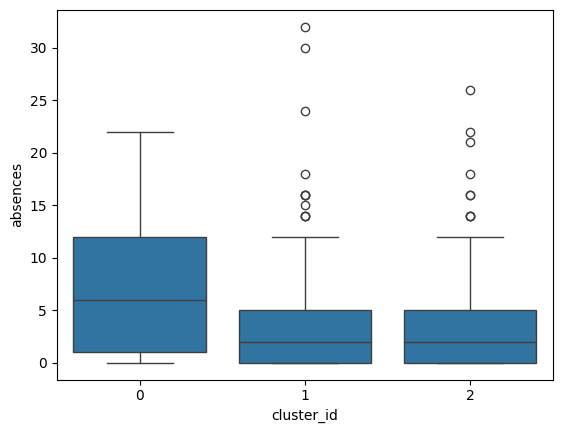

In [ ]:
sns.boxplot(data=df_original, y='absences', x='cluster_id')

### Vizualizace rozdělení vybraných atributů jednotlivých clusterů pomocí **barplotů**:

<Axes: xlabel='cluster_id', ylabel='Count'>

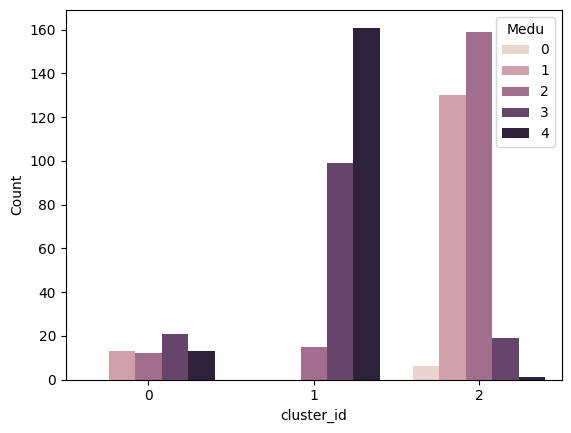

In [66]:
df_cluster_medu = df_original.groupby(['cluster_id', 'Medu']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_medu, x='cluster_id', y='Count', hue='Medu')

<Axes: xlabel='cluster_id', ylabel='Count'>

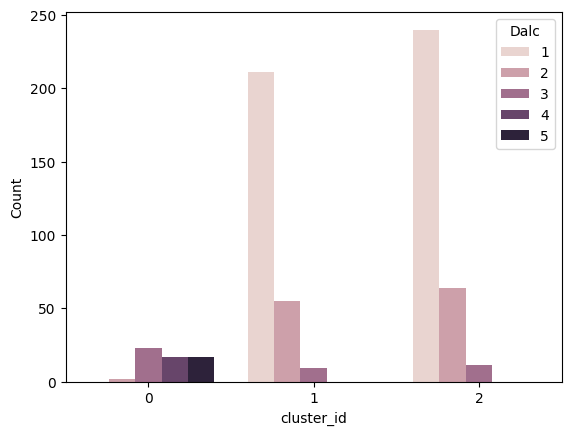

In [67]:
df_cluster_dalc = df_original.groupby(['cluster_id', 'Dalc']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_dalc, x='cluster_id', y='Count', hue='Dalc')

<Axes: xlabel='cluster_id', ylabel='Count'>

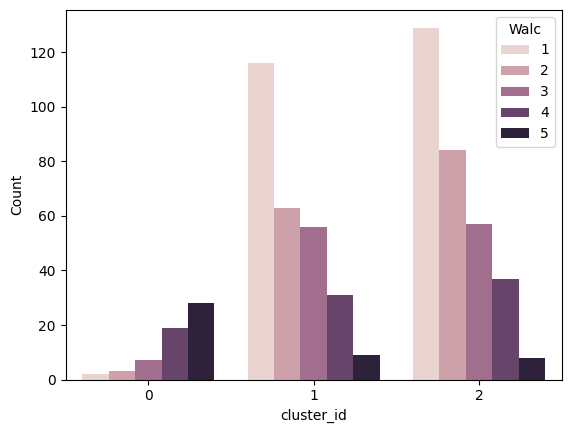

In [68]:
df_cluster_walc = df_original.groupby(['cluster_id', 'Walc']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_walc, x='cluster_id', y='Count', hue='Walc')

<Axes: xlabel='cluster_id', ylabel='Count'>

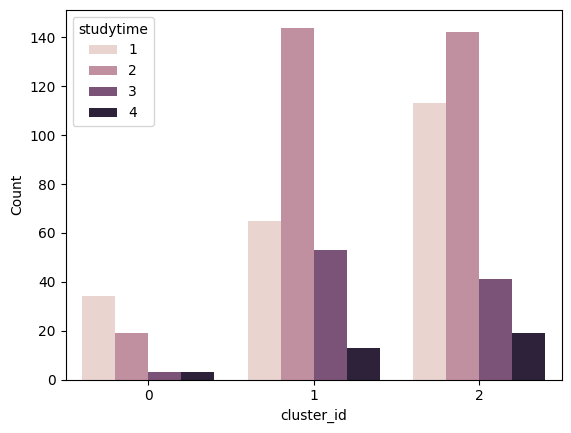

In [ ]:
df_cluster_studytime = df_original.groupby(['cluster_id', 'studytime']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_studytime, x='cluster_id', y='Count', hue='studytime')

<Axes: xlabel='cluster_id', ylabel='Count'>

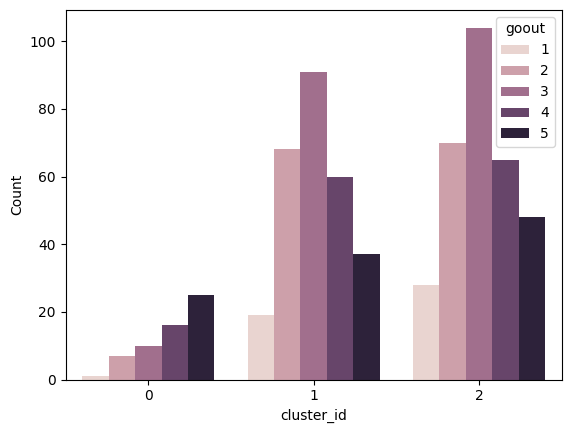

In [ ]:
df_cluster_goout = df_original.groupby(['cluster_id', 'goout']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_goout, x='cluster_id', y='Count', hue='goout')

##Shrnutí shlukovací analýzy pomocí K-means:
Na začátku jsem si pro shlukování vybral několik vhodných atributů, které jsem vhodně upravil a naškáloval. Konkrétním atributům a jejich úpravám se pro přehlednost věnuji přímo v části, kde k výběru a úpravě dochází. Z takto upraveného datasetu jsem posléze pomocí **elbow method** a **silhouette score** určil nejvhodnější počet shluků, na které data rozdělit. Dále jsem provedl shlukování pomocí algoritmu k-means a do původního datatsetu přidal nový atribut reprezentující příslušnost k danému shluku. Zobrazil jsem si počet studentů v jednotlivých shlucích a následně pomocí boxplotů a barplotů vizualizoval zajimavé vlastnosti jednotlivých shluků.
### Cluster 1:
Studenti v tomto shluku mají nejhorší známky. Jedná se starší studenty s vyššími absencemi. Vzdělání rodičů těchto žáků je zastoupeno víceméně rovnoměrně. Nad studenty v ostatních shlucích však převažují nadměrnou konzumací alkoholu a to jak o víkendu tak hlavně přes pracovní dny. Studiu věnují málo času a chodí častěji ven s kamarády.
### Cluster 2:
Skupina studentů nižšího věku, kteří mají nejlepší známky. Obecně mají nízkou absenci a je pro ně specifické převažující vyšší vzdělání rodičů. Konzumace alkoholu je u nich také podstatně nižší, hlavně přes pracovní dny. Studiu věnují více času. S přáteli venku naopak času méně, než studenti v prvním shluku.
### Cluster 3:
Jedná se studenty různého věku, kteří mají oproti ostatním shlukům průměrné výsledky. U jejich rodičů převažuje střední vzdělání a jejich konzumace alkoholu je podobná jako u druhého shluku, stejně jako čas strávený studiem či chozením ven s kamarády.

###Závěr:


# Část 2. - Aglomerativní shlukování

Pro aglomerativní shlukování použijeme již upravený a naškálovaný dataset **df_encoded**.

In [82]:
df_encoded.head()

,absences,age,grades,studytime,Dalc,Medu,Fedu
0,0.587833,0.428571,0.346154,2,1,4,4
1,0.072587,0.285714,0.519231,2,1,1,1
2,0.909135,0.000000,0.634615,2,2,1,1
3,-1.157538,0.000000,0.730769,3,1,4,2
4,-1.157538,0.142857,0.634615,2,1,3,3


## Vizualizace dendogramu

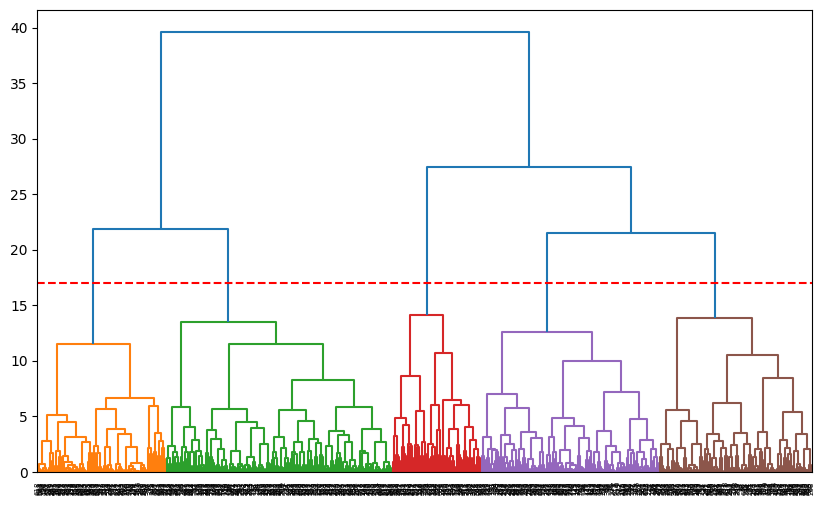

In [86]:
X = df_encoded.values
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=17)
plt.axhline(y=17, color='r', linestyle='--')
plt.show()

Po vizualizaci dendogramu se mi jeví jako nejrozumnější rozdělit dataset na **5 shluků**, což jsem vizualizoval přerušovanou červenou čárou a barevným rozlišením jednotlivých shluků. Příslušnost k danému shluků, stejně jako již výše u K-means, vložíme jako nový atribut do původního datasetu **df_original**.

In [87]:
clusters = fcluster(linkage_matrix, t=17, criterion='distance')
df_original['cluster_id'] = clusters
df_original.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades,cluster_id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,7.333333,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,10.333333,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12.333333,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14.000000,5
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,12.333333,5


## Čestnost studentů v jednotlivých shlucích

<Axes: xlabel='cluster_id', ylabel='count'>

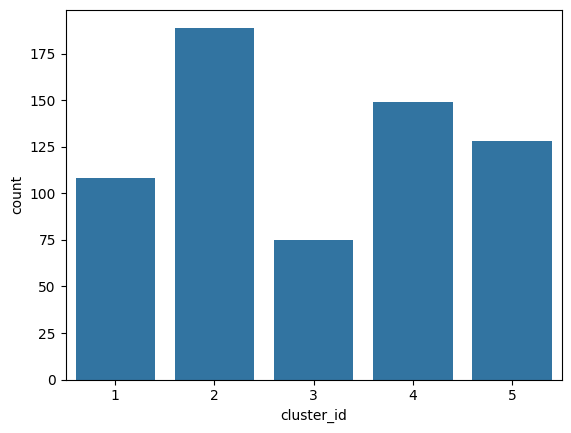

In [88]:
sns.countplot(data=df_original, x='cluster_id')

Zde můžeme vidět, že nejmenší je třetí shluk, naopak nejvíce studentů je přiřazeno do shluku číslo 2.

##Vizualizace rozdělení vybraných atributů jednotlivých clusterů pomocí **boxplotů**:

<Axes: xlabel='cluster_id', ylabel='age'>

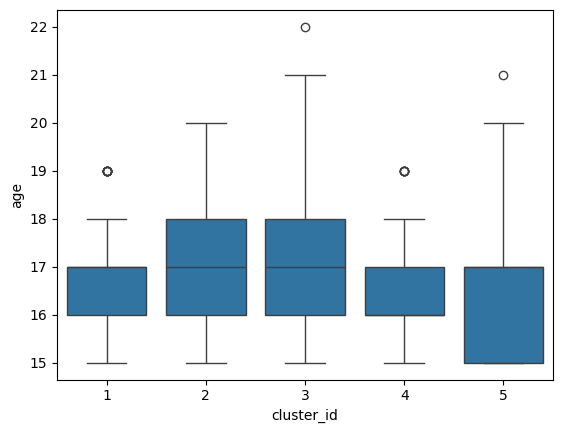

In [89]:
sns.boxplot(data=df_original, y='age', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='grades'>

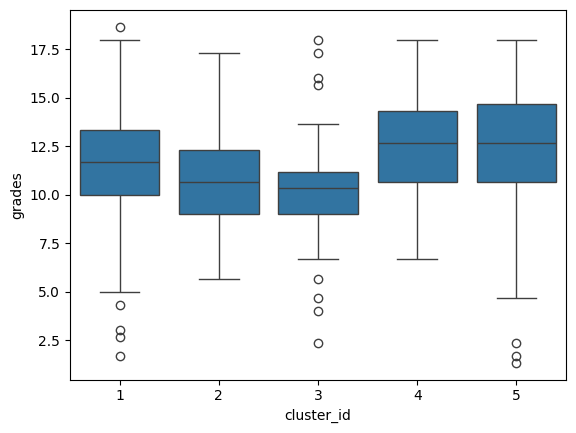

In [90]:
sns.boxplot(data=df_original, y='grades', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='absences'>

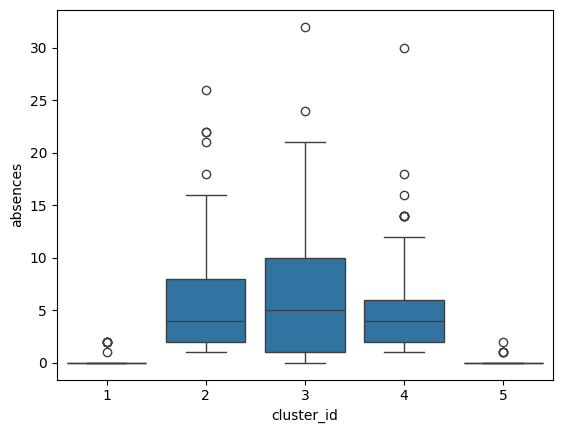

In [91]:
sns.boxplot(data=df_original, y='absences', x='cluster_id')

### Vizualizace rozdělení vybraných atributů jednotlivých clusterů pomocí **barplotů**

<Axes: xlabel='cluster_id', ylabel='Count'>

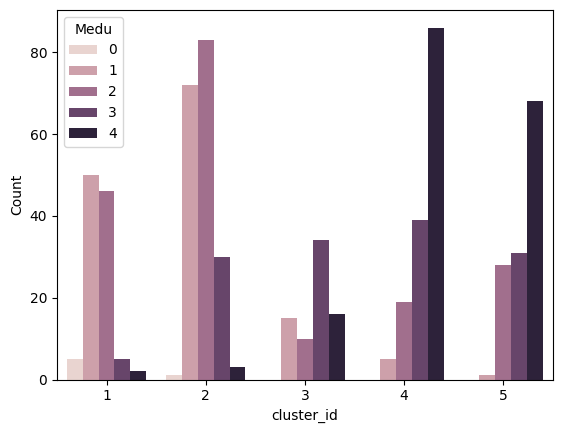

In [92]:
df_cluster_medu = df_original.groupby(['cluster_id', 'Medu']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_medu, x='cluster_id', y='Count', hue='Medu')

<Axes: xlabel='cluster_id', ylabel='Count'>

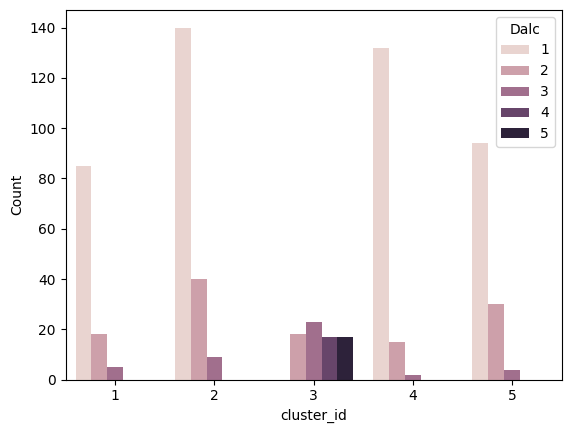

In [93]:
df_cluster_dalc = df_original.groupby(['cluster_id', 'Dalc']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_dalc, x='cluster_id', y='Count', hue='Dalc')

<Axes: xlabel='cluster_id', ylabel='Count'>

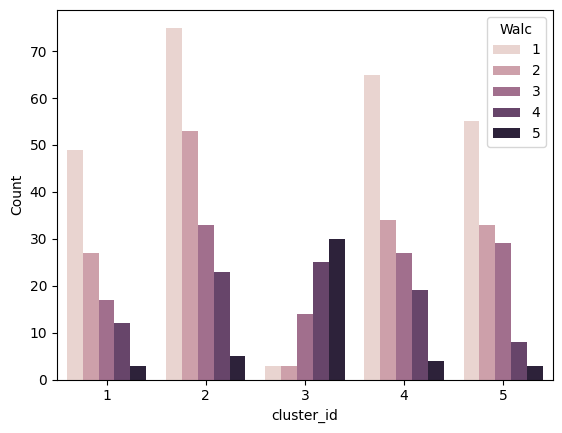

In [94]:
df_cluster_walc = df_original.groupby(['cluster_id', 'Walc']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_walc, x='cluster_id', y='Count', hue='Walc')

<Axes: xlabel='cluster_id', ylabel='Count'>

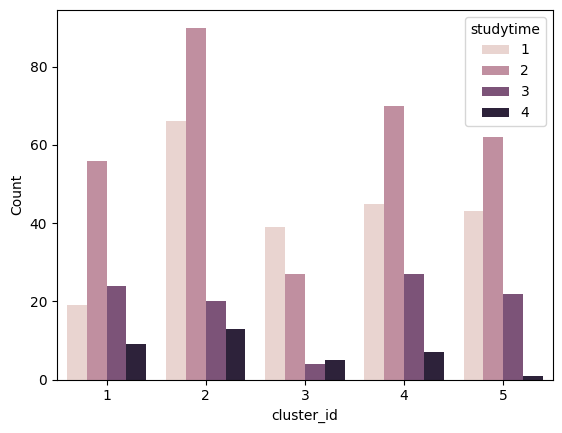

In [95]:
df_cluster_studytime = df_original.groupby(['cluster_id', 'studytime']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_studytime, x='cluster_id', y='Count', hue='studytime')

<Axes: xlabel='cluster_id', ylabel='Count'>

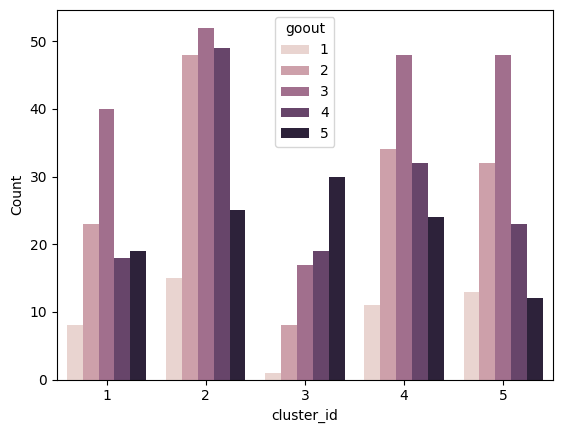

In [96]:
df_cluster_goout = df_original.groupby(['cluster_id', 'goout']).size().reset_index(name='Count')
sns.barplot(data=df_cluster_goout, x='cluster_id', y='Count', hue='goout')

##Shrnutí shlukovací analýzy pomocí aglomerativního shlukování:

### Cluster 1:
Jedná se o studenty ve věku převážně 16 - 17 let, kteří mají průměrné studijní výsledky. Nemají prakticky žádné absence. Vzdělání jejich rodičů je spíše nižší. Alkohol přes pracovní dny prakticky nepijí a o víkendu jen příležitostně. Čas věnovaný studiu se zdá být průměrný.

### Cluster 2:
V tomto shluku se nacházejí studenti širšího věku s horšími známkami, kteří mají o něco vyšší absence. Vzdělání jejich rodičů je nižší. Alkohol pijí obdobně jako studenti z prvního shluku. Čas věnovaný studiu je rovněž obdobný.

### Cluster 3:
Do tohoto shluku spadají studenti pro které je charakteristická vyšší konzumace alkoholu a to jak o víkednech, tak i přes pracovní dny. Málo času věnují studiu a více času venku s kamarády. Vzdělání jejich rodičů je sice vyšší, než v případě prvních dvou shluků, avšak jejich známky jsou nejnižší a absence nejvyšší ze studentů z celého datasetu.

### Cluster 4:
Tito studenti sice mají nějaké absence, avšak i přes to mají lepší známky. Je to možná díky tomu, že i vzdělání jejich rodičů je vyšší a zároveň tito studenti konzumují alkohol jen minimálně o víkendu a přes pracovní dny téměř vůbec. Čas věnovaný studiu je obdobný jako v případě prvního a druhého shluku.

### Cluster 5:
V tomto shluku se ve větší míře vyskytují mladší studenti. V průměru mají lepší známky a téměř žádné absence. Jejich rodiče mají vyšší vzdělání, alkohol téměř nekonzumují a vzdělání věnují průměrný čas.

#Celkoý závěr projektu
V projektu jsem si vyzkoušel **explorační datovou analýzu**, **shlukování pomocí K-means** a **aglomerační shlukování** nad datasetem obsahující sociální, genderová a studijní data studentů ze dvou středních škol. Obecně se dá říci, že na studijní výsledky studentů s ohledem na informace získané prací s tímto datasetem má vliv několik hlavních atributů. V prvé řadě je jím vzdělání rodičů. Studenti, kteří mají rodiče s vyšším vzděláním dosahují lepších studijních výsledků. Na studijních výsledcích se naopak negativně podepisuje konzumace alkoholu a to primárně konzumace alkoholu přes pracovní dny. Studenti kteří tráví učením méně času a více chodí ven s kamarády mají rovnež horší studijní výsledky. Zajímavostí je rovněž zjištění, že studenti, kteří jako malí chodili do školky, mají následně menší absence než ti, kteří do školky nechodili.